In [4]:
import numpy as np
import nltk
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

df.head(8)



,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


In [22]:
names = np.unique(df.target.values)

labels = {
    names[0]: 1,
    names[1]: 2,
    names[2]: 3
}

for label in labels.keys():
  df.target[df.target == label] = labels[label]

df.head(8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1


In [98]:
X = df.iloc[:, :4].values
Y = df.iloc[:, -1].values

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.25,
                                                    random_state = 42) 

In [100]:
def pca_decomp(X, dim_components = 2):

  X_mean = X - np.mean(X, axis = 0)

  covar_matrix = np.cov(X_mean, rowvar=False)

  eig_vals, eig_vecs = np.linalg.eigh(covar_matrix,UPLO='L')
  idx_sorted = np.flip(np.argsort(eig_vals))

  eig_vecs_sorted = eig_vecs[:, idx_sorted]
  eig_vecs_subset = eig_vecs_sorted[:, :dim_components]

  X_reduced = np.dot(X_mean, eig_vecs_subset)

  return X_reduced




In [101]:
X_reduced = pca_decomp(X)

print(X_reduced.shape)

(150, 2)


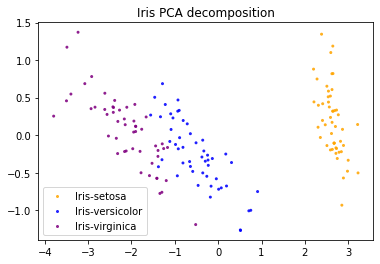

In [102]:
colors = ['orange','blue','purple']

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
            c = [colors[i-1] for i in Y], 
            alpha = 0.8,
            s = 4)
vals = [1, 60, 120]
for i in range(len(colors)):
  plt.scatter(X_reduced[vals[i], 0], X_reduced[vals[i], 1],
              c = colors[i],
              alpha = 0.8,
              s = 4,
              label = names[i])
plt.legend()  
plt.title('Iris PCA decomposition')
plt.show()